Command for room_temperature=15°C and target_temperature=25°C: 1.10
Command for room_temperature=30°C and target_temperature=20°C: -2.05
Command for room_temperature=20°C and target_temperature=20°C: -0.00
Command for room_temperature=0°C and target_temperature=0°C: -0.00
Command for room_temperature=40°C and target_temperature=40°C: -0.00
Command for room_temperature=0°C and target_temperature=40°C: 3.79
Command for room_temperature=40°C and target_temperature=0°C: -3.80


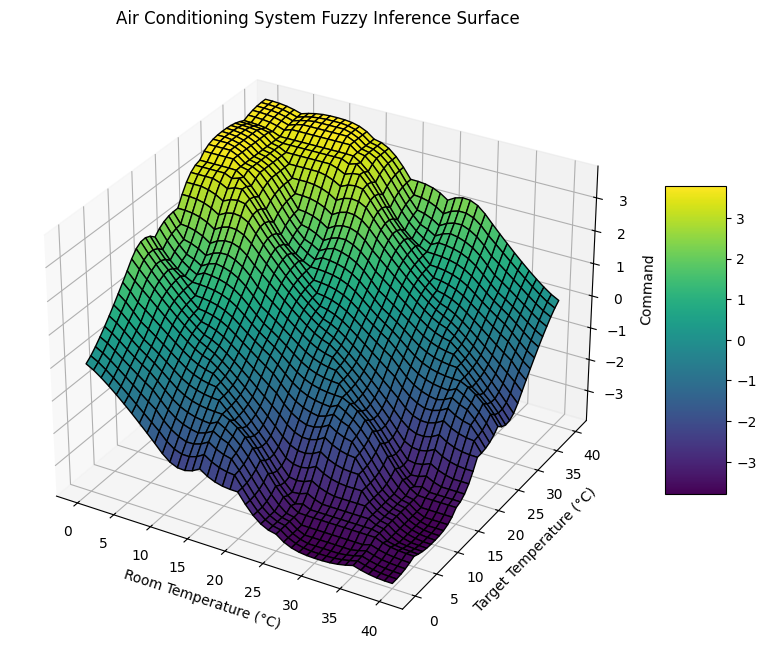

rule1 = ctrl.Rule(room_temperature['very_cold'] & target_temperature['very_cold'], command['no_change'])
rule2 = ctrl.Rule(room_temperature['very_cold'] & target_temperature['cold'], command['heat'])
rule3 = ctrl.Rule(room_temperature['very_cold'] & target_temperature['medium'], command['heat'])
rule4 = ctrl.Rule(room_temperature['very_cold'] & target_temperature['hot'], command['heat'])
rule5 = ctrl.Rule(room_temperature['very_cold'] & target_temperature['very_hot'], command['heat'])
rule6 = ctrl.Rule(room_temperature['cold'] & target_temperature['very_cold'], command['cool'])
rule7 = ctrl.Rule(room_temperature['cold'] & target_temperature['cold'], command['no_change'])
rule8 = ctrl.Rule(room_temperature['cold'] & target_temperature['medium'], command['heat'])
rule9 = ctrl.Rule(room_temperature['cold'] & target_temperature['hot'], command['heat'])
rule10 = ctrl.Rule(room_temperature['cold'] & target_temperature['very_hot'], command['heat'])
rule11 = ctrl.Rule(room_temperature['medium'

In [31]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from itertools import product

# Fuzzy input variables
room_temperature = ctrl.Antecedent(np.arange(0, 41, 0.1), 'room_temperature')
target_temperature = ctrl.Antecedent(np.arange(0, 41, 0.1), 'target_temperature')

# Fuzzy output variable
command = ctrl.Consequent(np.arange(-5, 5, 0.01), 'command')

# Gaussian membership functions for room temperature
room_temperature['very_cold'] = fuzz.gaussmf(room_temperature.universe, 0, 5)
room_temperature['cold'] = fuzz.gaussmf(room_temperature.universe, 10, 5)
room_temperature['medium'] = fuzz.gaussmf(room_temperature.universe, 20, 5)
room_temperature['hot'] = fuzz.gaussmf(room_temperature.universe, 30, 5)
room_temperature['very_hot'] = fuzz.gaussmf(room_temperature.universe, 40, 5)

# Gaussian membership functions for target temperature
target_temperature['very_cold'] = fuzz.gaussmf(target_temperature.universe, 0, 5)
target_temperature['cold'] = fuzz.gaussmf(target_temperature.universe, 10, 5)
target_temperature['medium'] = fuzz.gaussmf(target_temperature.universe, 20, 5)
target_temperature['hot'] = fuzz.gaussmf(target_temperature.universe, 30, 5)
target_temperature['very_hot'] = fuzz.gaussmf(target_temperature.universe, 40, 5)

# Gaussian membership functions for command
command['cool'] = fuzz.gaussmf(command.universe, -5, 1.5)
command['no_change'] = fuzz.gaussmf(command.universe, 0, 1.5)
command['heat'] = fuzz.gaussmf(command.universe, 5, 1.5)

# Fuzzy rules
# × = Cartesian product
# Room Temperature × Target Temperature
# { very_cold, cold, medium, hot, very_hot } × { very_cold, cold, medium, hot, very_hot } = 25 rules
# ----------------------------------------------------------------------------
# |            | Very Cold | Cold       | Medium    | Hot       | Very Hot   |
# | Very Cold  | No Change | Heat       | Heat      | Heat      | Heat       |
# | Cold       | Cool      | No Change  | Heat      | Heat      | Heat       |
# | Medium     | Cool      | Cool       | No Change | Heat      | Heat       |
# | Hot        | Cool      | Cool       | Cool      | No Change | Heat       |
# | Very Hot   | Cool      | Cool       | Cool      | Cool      | No Change  |
# ----------------------------------------------------------------------------
def print_rules(labels1, labels2, mapping_table):
    combinations = list(product(labels1, labels2)) # Cartesian product
    for i, (room_label, target_label) in enumerate(combinations, start=1):
        row_index = labels1.index(room_label)
        column_index = labels2.index(target_label)
        command_label = mapping_table[row_index][column_index]
        print(f"rule{i} = ctrl.Rule(room_temperature['{room_label}'] & target_temperature['{target_label}'], command['{command_label}'])")

rule1 = ctrl.Rule(room_temperature['very_cold'] & target_temperature['very_cold'], command['no_change'])
rule2 = ctrl.Rule(room_temperature['very_cold'] & target_temperature['cold'], command['heat'])
rule3 = ctrl.Rule(room_temperature['very_cold'] & target_temperature['medium'], command['heat'])
rule4 = ctrl.Rule(room_temperature['very_cold'] & target_temperature['hot'], command['heat'])
rule5 = ctrl.Rule(room_temperature['very_cold'] & target_temperature['very_hot'], command['heat'])
rule6 = ctrl.Rule(room_temperature['cold'] & target_temperature['very_cold'], command['cool'])
rule7 = ctrl.Rule(room_temperature['cold'] & target_temperature['cold'], command['no_change'])
rule8 = ctrl.Rule(room_temperature['cold'] & target_temperature['medium'], command['heat'])
rule9 = ctrl.Rule(room_temperature['cold'] & target_temperature['hot'], command['heat'])
rule10 = ctrl.Rule(room_temperature['cold'] & target_temperature['very_hot'], command['heat'])
rule11 = ctrl.Rule(room_temperature['medium'] & target_temperature['very_cold'], command['cool'])
rule12 = ctrl.Rule(room_temperature['medium'] & target_temperature['cold'], command['cool'])
rule13 = ctrl.Rule(room_temperature['medium'] & target_temperature['medium'], command['no_change'])
rule14 = ctrl.Rule(room_temperature['medium'] & target_temperature['hot'], command['heat'])
rule15 = ctrl.Rule(room_temperature['medium'] & target_temperature['very_hot'], command['heat'])
rule16 = ctrl.Rule(room_temperature['hot'] & target_temperature['very_cold'], command['cool'])
rule17 = ctrl.Rule(room_temperature['hot'] & target_temperature['cold'], command['cool'])
rule18 = ctrl.Rule(room_temperature['hot'] & target_temperature['medium'], command['cool'])
rule19 = ctrl.Rule(room_temperature['hot'] & target_temperature['hot'], command['no_change'])
rule20 = ctrl.Rule(room_temperature['hot'] & target_temperature['very_hot'], command['heat'])
rule21 = ctrl.Rule(room_temperature['very_hot'] & target_temperature['very_cold'], command['cool'])
rule22 = ctrl.Rule(room_temperature['very_hot'] & target_temperature['cold'], command['cool'])
rule23 = ctrl.Rule(room_temperature['very_hot'] & target_temperature['medium'], command['cool'])
rule24 = ctrl.Rule(room_temperature['very_hot'] & target_temperature['hot'], command['cool'])
rule25 = ctrl.Rule(room_temperature['very_hot'] & target_temperature['very_hot'], command['no_change'])

# Fuzzy control system
ac_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5,
    rule6, rule7, rule8, rule9, rule10,
    rule11, rule12, rule13, rule14, rule15,
    rule16, rule17, rule18, rule19, rule20,
    rule21, rule22, rule23, rule24, rule25
])
ac_simulation = ctrl.ControlSystemSimulation(ac_ctrl)

def plot_fuzzy_surface():
    room_vals = np.linspace(0, 40, 41)
    target_vals = np.linspace(0, 40, 41)
    room_grid, target_grid = np.meshgrid(room_vals, target_vals)
    command_grid = np.zeros_like(room_grid)
    for i in range(room_grid.shape[0]):
        for j in range(room_grid.shape[1]):
            ac_simulation.input['room_temperature'] = room_grid[i, j]
            ac_simulation.input['target_temperature'] = target_grid[i, j]
            ac_simulation.compute()
            command_grid[i, j] = ac_simulation.output['command']
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(room_grid, target_grid, command_grid, cmap='viridis', edgecolor='k')
    ax.set_xlabel('Room Temperature (°C)')
    ax.set_ylabel('Target Temperature (°C)')
    ax.set_zlabel('Command')
    ax.set_title('Air Conditioning System Fuzzy Inference Surface')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.savefig('fuzzy_inference_surface.png')
    plt.show()

def evaluate_model():
    test_cases = [
        {'room_temperature': 15, 'target_temperature': 25},  # Lower room
        {'room_temperature': 30, 'target_temperature': 20},  # Higher room
        {'room_temperature': 20, 'target_temperature': 20},  # Midpoint
        {'room_temperature': 0,  'target_temperature': 0},   # Both at minimum
        {'room_temperature': 40, 'target_temperature': 40},  # Both at maximum
        {'room_temperature': 0,  'target_temperature': 40},  # Room min, target max
        {'room_temperature': 40, 'target_temperature': 0},   # Room max, target min
    ]
    for case in test_cases:
        ac_simulation.input['room_temperature'] = case["room_temperature"]
        ac_simulation.input['target_temperature'] = case["target_temperature"]
        ac_simulation.compute()
        print(f"Command for room_temperature={case['room_temperature']}°C and "
            f"target_temperature={case['target_temperature']}°C: {ac_simulation.output['command']:.2f}")

evaluate_model()
plot_fuzzy_surface()

room_temperature_labels = ['very_cold', 'cold', 'medium', 'hot', 'very_hot']
target_temperature_labels = ['very_cold', 'cold', 'medium', 'hot', 'very_hot']
mapping_table = [
    ['no_change', 'heat', 'heat', 'heat', 'heat'],
    ['cool', 'no_change', 'heat', 'heat', 'heat'],
    ['cool', 'cool', 'no_change', 'heat', 'heat'],
    ['cool', 'cool', 'cool', 'no_change', 'heat'],
    ['cool', 'cool', 'cool', 'cool', 'no_change']
]
print_rules(room_temperature_labels, target_temperature_labels, mapping_table) # Fuzzy rules to copy & paste